# Perkenalan

## Team :

1. Nichoulaus Verdhy P - PYTN-KS011-023
2. Tassyirifiyya - PYTN-KS011-012
3. Isma - PYTN-KS011-008

Python for Data Science - Studi Independen - Kampus Merdeka

# Latar Belakang

Heart Failure Clinical Records Dataset adalah kumpulan data yang berisi informasi klinis pasien dengan gagal jantung, Dataset ini memberikan wawasan berharga tentang faktor-faktor dan variabel yang terkait dengan gagal jantung. Dataset ini mencakup berbagai fitur atau variabel yang menggambarkan berbagai aspek kesehatan pasien, seperti usia, jenis kelamin, tekanan darah, kadar kreatinin, dan sebagainya. Dengan menganalisis dataset ini, kita dapat mencari hubungan antara variabel-variabel tersebut dan risiko atau kemungkinan terjadinya gagal jantung.

Beberapa variabel yang umumnya terdapat dalam dataset ini dan dapat dianalisis antara lain:

1. Umur: Usia pasien dapat menjadi faktor risiko atau indikator keparahan gagal jantung.
2. Jenis Kelamin: Analisis dapat dilakukan untuk melihat perbedaan antara jenis kelamin dalam hal prevalensi atau karakteristik gagal jantung.
3. Anemia: Faktor anemia dapat dikaji untuk melihat pengaruhnya terhadap perkembangan atau progresi gagal jantung.
4. Kreatinin Fosfokinase: Kadar enzim kreatinin fosfokinase dalam darah dapat memberikan informasi tentang kerusakan otot jantung.
5. Diabetes: Analisis dapat dilakukan untuk melihat hubungan antara diabetes dan risiko atau keparahan gagal jantung.
6. Fraksi Ejeksi: Fraksi ejeksi menggambarkan kemampuan jantung untuk memompa darah. Analisis fraksi ejeksi dapat memberikan informasi tentang fungsi jantung.
7. Tekanan Darah Tinggi: Hubungan antara tekanan darah tinggi dan gagal jantung dapat diteliti untuk memahami keterkaitan keduanya.
8. Platelet: Kadar platelet dalam darah dapat dikaji untuk mengevaluasi peran gangguan pembekuan darah pada gagal jantung.
9. Serum Kreatinin: Kadar kreatinin dalam darah dapat menjadi indikator fungsi ginjal dan berpotensi terkait dengan gagal jantung. Semakin tinggi kadar serum kreatinen maka ginjal tidak berfungsi dengan baik
10. Sodium Kreatin: Kadar natrium dan kreatinin dalam darah dapat memberikan informasi tentang keseimbangan elektrolit dan fungsi ginjal.
11. Perokok: Analisis dapat dilakukan untuk melihat hubungan antara merokok dan risiko atau keparahan gagal jantung.
12. Waktu: Lama kunjungan pasien atau waktu tindak lanjut dapat memberikan informasi tentang prognosis atau kebutuhan perawatan jangka panjang.
13. Kematian: Variabel ini dapat memberikan informasi tentang status kematian pasien

Variabel-variabel ini dapat dianalisis untuk mencari hubungan, pola, atau faktor risiko yang terkait dengan gagal jantung

## Objektif 

Final Project 3 ini dibuat guna mengevaluasi konsep Ensemble sebagai berikut:

● Mampu memahami konsep Classification dengan Ensemble Model

● Mampu mempersiapkan data untuk digunakan dalam Ensemble Model

● Mampu mengimplementasikan Ensemble Model untuk membuat prediksi

# Import Pustaka

In [1]:
#untuk dataframe
import pandas as pd
import numpy as np

#untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import folium
from folium.plugins import FastMarkerCluster

#mengatur display biar maximal
pd.options.display.max_rows = None
pd.options.display.max_columns = None

#modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score # mencari accurasi 
from sklearn.metrics import confusion_matrix # membuat confusion maytris
from sklearn.metrics import classification_report # laporan klasifikasi
from sklearn.metrics import r2_score # evaluasi performa model
from sklearn.metrics import mean_squared_error # menghitung nilai error rata-rata
from imblearn.over_sampling import SMOTE #Balancing data
from sklearn.ensemble import BaggingClassifier, VotingClassifier, StackingClassifier

# Data Loading

## Memanggil Dataset

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Melihat Ukuran Data ( Baris, kolom)

In [3]:
df.shape

(299, 13)

## Pengecekan Nama Kolom

In [4]:
df.columns.values

array(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'], dtype=object)

## Penjelasan Perkolom

1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

## Tipe Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Deakriptif Statistik

In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Pengecekan Missing Value

In [7]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## Perhitungan Persentase Missing Value

In [8]:
for col in df.columns:
    null_count = df[col].isnull().sum()
    total_count = len(df[col])
    perc_missing = (null_count / total_count) * 100
    
    print(f"Kolom {col}:")
    print(f"Jumlah nilai null: {null_count}")
    print(f"Total data: {total_count}")
    print(f"Persentase missing value: {perc_missing:.2f}%\n")

Kolom age:
Jumlah nilai null: 0
Total data: 299
Persentase missing value: 0.00%

Kolom anaemia:
Jumlah nilai null: 0
Total data: 299
Persentase missing value: 0.00%

Kolom creatinine_phosphokinase:
Jumlah nilai null: 0
Total data: 299
Persentase missing value: 0.00%

Kolom diabetes:
Jumlah nilai null: 0
Total data: 299
Persentase missing value: 0.00%

Kolom ejection_fraction:
Jumlah nilai null: 0
Total data: 299
Persentase missing value: 0.00%

Kolom high_blood_pressure:
Jumlah nilai null: 0
Total data: 299
Persentase missing value: 0.00%

Kolom platelets:
Jumlah nilai null: 0
Total data: 299
Persentase missing value: 0.00%

Kolom serum_creatinine:
Jumlah nilai null: 0
Total data: 299
Persentase missing value: 0.00%

Kolom serum_sodium:
Jumlah nilai null: 0
Total data: 299
Persentase missing value: 0.00%

Kolom sex:
Jumlah nilai null: 0
Total data: 299
Persentase missing value: 0.00%

Kolom smoking:
Jumlah nilai null: 0
Total data: 299
Persentase missing value: 0.00%

Kolom time:
Jumla

## Pengecekan Data Yang Duplikat

In [9]:
df[df.duplicated()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


In [10]:
df.duplicated().sum()

0

# Data Cleansing

In [11]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [12]:
df.rename(columns={'age':'umur', 'anaemia':'anemia', 'creatinine_phosphokinase':'kreatin_fosfokinase', 'ejection_fraction':'fraksi_ejeksi', 'high_blood_pressure':'tekanan_darah_tinggi', 'serum_creatine':'kreatin_serum', 'serum_sodium':'sodium_kreatin', 'sex':'jenis_kelamin', 'smoking':'perokok', 'time':'waktu', 'DEATH_EVENT':'Kematian'}, inplace=True)
df.head()

,umur,anemia,kreatin_fosfokinase,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,platelets,serum_creatinine,sodium_kreatin,jenis_kelamin,perokok,waktu,Kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Eksplorasi Data Analist

0    203
1     96
Name: Kematian, dtype: int64


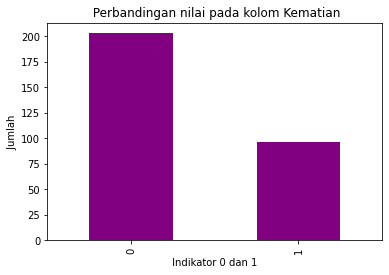

In [13]:
df["Kematian"].value_counts().plot(kind="bar", color='purple')
plt.title(" Perbandingan nilai pada kolom Kematian")
plt.xlabel(" Indikator 0 dan 1 ")
plt.ylabel(" Jumlah ")
print(df["Kematian"].value_counts())

#### Kesimpulan

Dari grafik batang diatas dapat disimpulkan bahwa lebih banyak dengan nilai '0' (Tidak mengalami kematian) dibandingkan dengan nilai '1' (Mengalami kematian).

## Barplot

#### Membandingkan kolom "perokok" dan "kematian"

([<matplotlib.axis.XTick at 0x17f2d984e50>,
 [Text(0, 0, 'Tidak meninggal'), Text(1, 0, 'meninggal')])

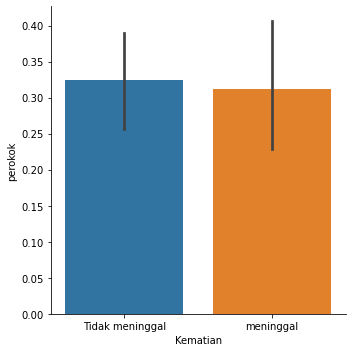

In [14]:
df[['perokok', 'Kematian']]
sns.catplot(data=df, x='Kematian', y='perokok', kind='bar')
plt.xticks(ticks=(0,1),labels=['Tidak meninggal','meninggal'])

##### Kesimpulan

Dari barplot diatas dapat disimpulkan bahwa perbandingan antara tidak meninggal dan meninggal pada perokok hampir memiliki nilai yang sama

#### Membandingkan kolom "anemia" dan "kematian"

([<matplotlib.axis.XTick at 0x17f2da11070>,
 [Text(0, 0, 'Tidak meninggal'), Text(1, 0, 'meninggal')])

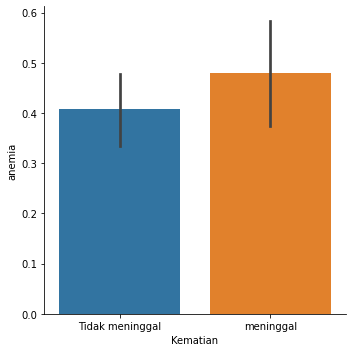

In [15]:
df[['anemia', 'Kematian']]
sns.catplot(data=df, x='Kematian', y='anemia', kind='bar')
plt.xticks(ticks=(0,1),labels=['Tidak meninggal','meninggal'])

##### Kesimpulan

Dari barplot di atas, dapat disimpulkan bahwa pada seseorang dengan kondisi anemia, terdapat jumlah yang lebih besar mengalami kematian daripada yang tidak mengalami kematian. Hal ini menunjukkan bahwa penderita anemia memiliki potensi yang lebih tinggi untuk mengalami gagal jantung dan risiko kematian.

#### Membandingkan kolom "kreatin_fosfokinase" dan "kematian"

([<matplotlib.axis.XTick at 0x17f2da75160>,
 [Text(0, 0, 'Tidak meninggal'), Text(1, 0, 'meninggal')])

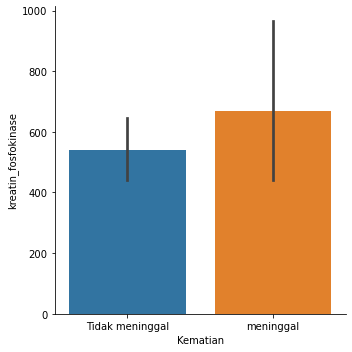

In [16]:
df[['kreatin_fosfokinase', 'Kematian']]
sns.catplot(data=df, x='Kematian', y='kreatin_fosfokinase', kind='bar')
plt.xticks(ticks=(0,1),labels=['Tidak meninggal','meninggal'])

##### Kesimpulan

Dari barplot di atas, dapat disimpulkan bahwa pada penderita kreatin_fosfokinase, jumlah yang mengalami kematian juga lebih besar daripada yang tidak mengalami kematian. maka penderita kreatin_fosfokinase juga berpotensi mengalami gagal jantung dan mengalami resiko kematian

#### Membandingkan kolom "diabetes" dan "kematian"

([<matplotlib.axis.XTick at 0x17f2dad6c70>,
 [Text(0, 0, 'Tidak meninggal'), Text(1, 0, 'meninggal')])

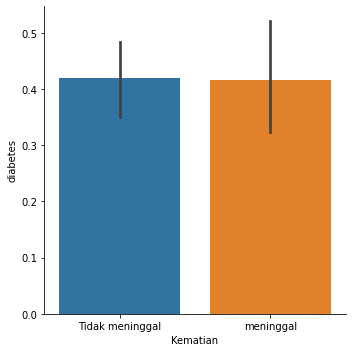

In [17]:
df[['diabetes', 'Kematian']]
sns.catplot(data=df, x='Kematian', y='diabetes', kind='bar')
plt.xticks(ticks=(0,1),labels=['Tidak meninggal','meninggal'])

##### kesimpulan

Dari barplot diatas dapat disimpulkan bahwa perbandingan antara tidak meninggal dan meninggal pada penderita diabetes hampir memiliki nilai yang sama

#### Membandingkan kolom "tekanan_darah_tinggi" dan "kematian"

([<matplotlib.axis.XTick at 0x17f2db3c790>,
 [Text(0, 0, 'Tidak meninggal'), Text(1, 0, 'meninggal')])

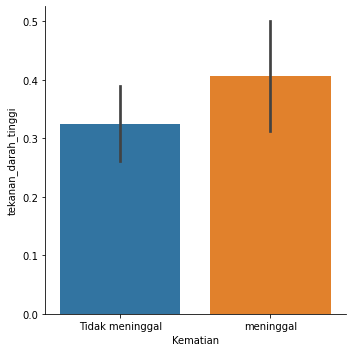

In [18]:
df[['tekanan_darah_tinggi', 'Kematian']]
sns.catplot(data=df, x='Kematian', y='tekanan_darah_tinggi', kind='bar')
plt.xticks(ticks=(0,1),labels=['Tidak meninggal','meninggal'])

##### Kesimpulan

Dari barplot di atas, dapat disimpulkan bahwa pada penderita tekanan darah tinggi, memiliki jumlah yang mengalami kematian  lebih besar daripada yang tidak mengalami kematian. maka penderita tekanan darah tinggi juga berpotensi mengalami gagal jantung dan resiko kematian

#### Membandingkan kolom "serum_creatinine" dan "kematian"

([<matplotlib.axis.XTick at 0x17f2dba12b0>,
 [Text(0, 0, 'Tidak meninggal'), Text(1, 0, 'meninggal')])

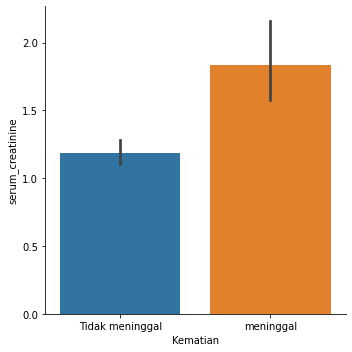

In [19]:
df[['serum_creatinine', 'Kematian']]
sns.catplot(data=df, x='Kematian', y='serum_creatinine', kind='bar')
plt.xticks(ticks=(0,1),labels=['Tidak meninggal','meninggal'])

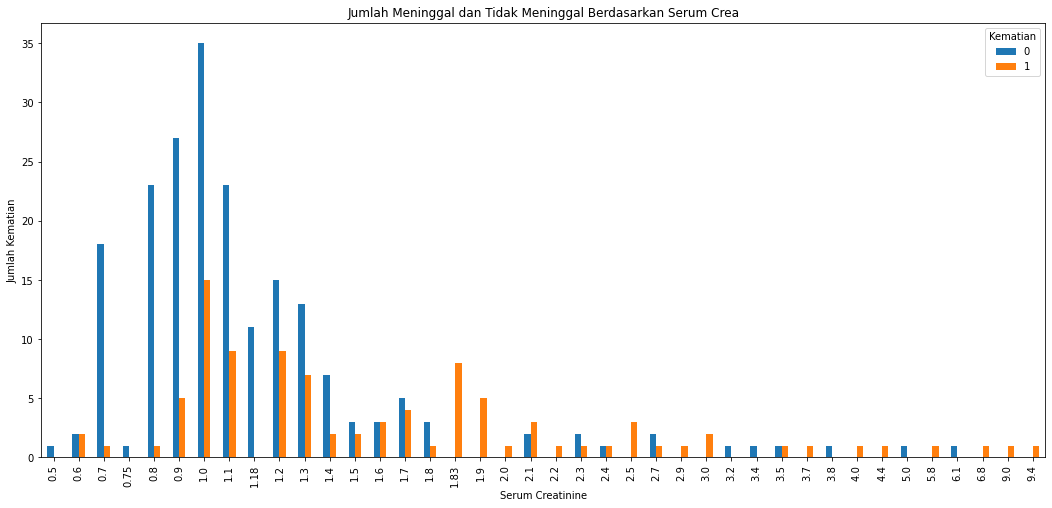

In [20]:
serum_counts = df.groupby(['serum_creatinine', 'Kematian']).size().unstack()
serum_counts.plot(kind='bar', stacked=False, figsize=(18,8))
plt.xlabel('Serum Creatinine')
plt.ylabel('Jumlah Kematian')
plt.title('Jumlah Meninggal dan Tidak Meninggal Berdasarkan Serum Crea')
plt.show()

##### Kesimpulan

Dari barplot di atas, dapat disimpulkan bahwa pada penderita serum_creatin, memiliki jumlah yang mengalami kematian jauh lebih besar daripada yang tidak mengalami kematian. maka penderita serum_creatin juga berpotensi mengalami gagal jantung dan resiko kematian.

Namun, peningkatan serum creatinine tidak terlalu mempengaruhi peningkatan jumlah orang yang meninggal

#### Membandingkan kolom "umur" dan "kematian"

([<matplotlib.axis.XTick at 0x17f2dd6c5b0>,
 [Text(0, 0, 'Tidak meninggal'), Text(1, 0, 'meninggal')])

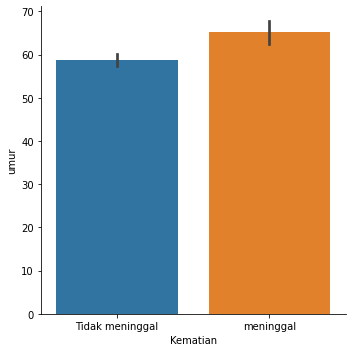

In [21]:
df[['umur', 'Kematian']]
sns.catplot(data=df, x='Kematian', y='umur', kind='bar')
plt.xticks(ticks=(0,1),labels=['Tidak meninggal','meninggal'])

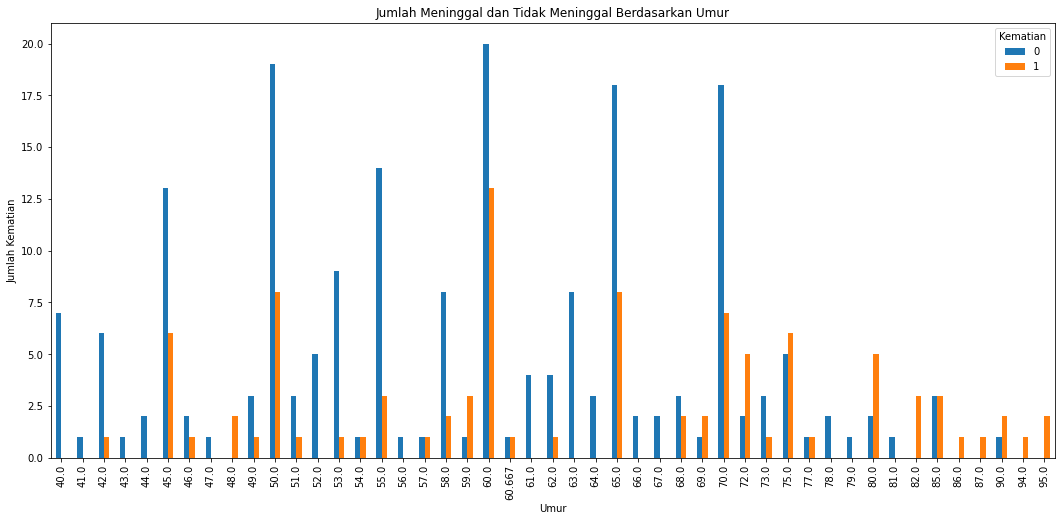

In [22]:
age_counts = df.groupby(['umur', 'Kematian']).size().unstack()
age_counts.plot(kind='bar', stacked=False, figsize=(18,8))
plt.xlabel('Umur')
plt.ylabel('Jumlah Kematian')
plt.title('Jumlah Meninggal dan Tidak Meninggal Berdasarkan Umur')
plt.show()

**Kesimpulan**

Umur tidak terlalu mempengaruhi peningkatan jumlah kematian pada orang. Namun pada usia yang semakin lanjut, tingkat kematian akan selalu ada dan tingkat tidak meninggal akan semakin minim. Terutama pada lansia berumur 60 tahun lebih rentan untuk mengalami resiko kematian

([<matplotlib.axis.XTick at 0x17f2df10790>,
 [Text(0, 0, 'Tidak meninggal'), Text(1, 0, 'meninggal')])

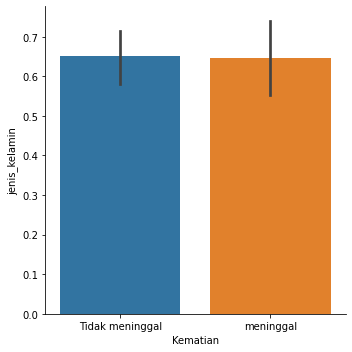

In [23]:
df[['jenis_kelamin', 'Kematian']]
sns.catplot(data=df, x='Kematian', y='jenis_kelamin', kind='bar')
plt.xticks(ticks=(0,1),labels=['Tidak meninggal','meninggal'])

In [24]:
df.jenis_kelamin.value_counts()

1    194
0    105
Name: jenis_kelamin, dtype: int64

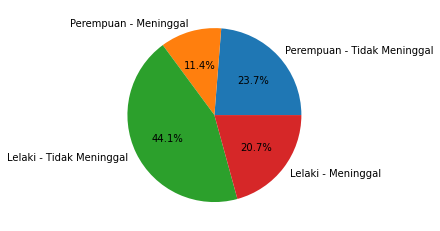

In [25]:
jk_group = df.groupby(['jenis_kelamin', 'Kematian']).size()
plt.pie(jk_group, labels=['Perempuan - Tidak Meninggal', 'Perempuan - Meninggal',
                          'Lelaki - Tidak Meninggal', 'Lelaki - Meninggal'],
                           autopct='%1.1f%%')
plt.show()

##### Kesimpulan

Dari barplot di atas, dapat disimpulkan bahwa, jumlah yang mengalami kematian lebih besar daripada yang tidak mengalami kematian. maka umur juga merupakan salah satu penyebab dari seseorang mengalami gagal jantung dan resiko kematian

Namun, pada pie chart didapatkan informasi bahwa 

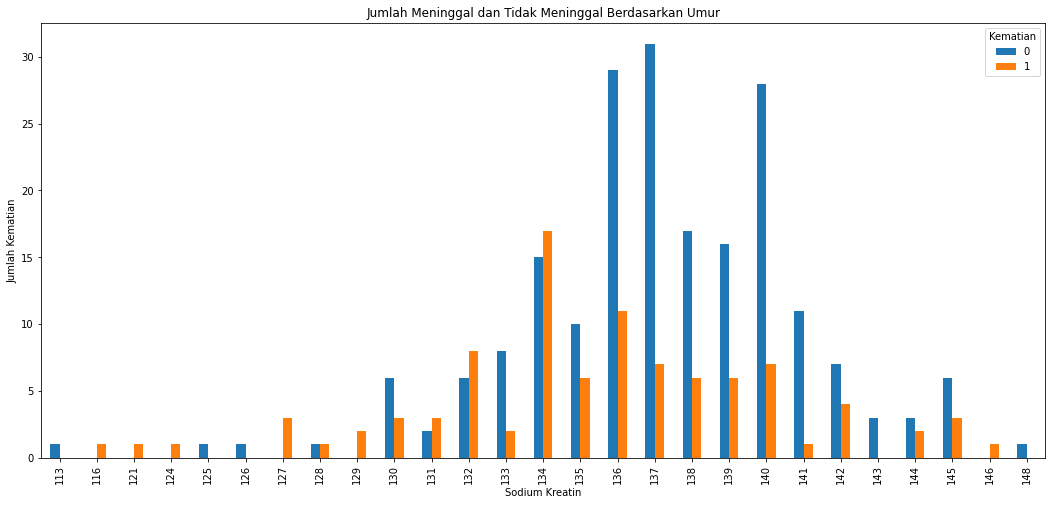

In [26]:
sodium_counts = df.groupby(['sodium_kreatin', 'Kematian']).size().unstack()
sodium_counts.plot(kind='bar', stacked=False, figsize=(18,8))
plt.xlabel('Sodium Kreatin')
plt.ylabel('Jumlah Kematian')
plt.title('Jumlah Meninggal dan Tidak Meninggal Berdasarkan Umur')
plt.show()

**Kesimpulan**

Pada kadar sodium kreatin 132 -140, jumlah kematian pada seseorang semakin tinggi

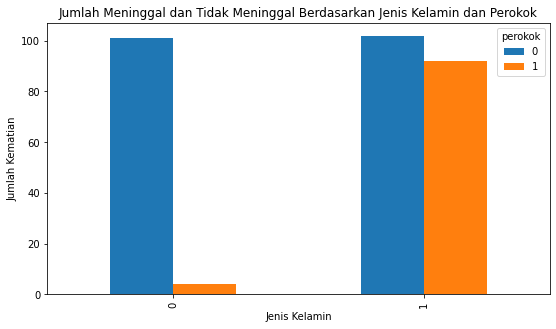

In [27]:
age_counts = df.groupby(['jenis_kelamin', 'perokok']).size().unstack()
age_counts.plot(kind='bar', stacked=False, figsize=(9,5))
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Kematian')
plt.title('Jumlah Meninggal dan Tidak Meninggal Berdasarkan Jenis Kelamin dan Perokok')
plt.show()

*note*

gatau yang mana laki laki yang mana perempuan

## Mengecek Outlier

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-p

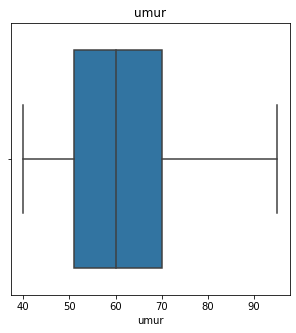

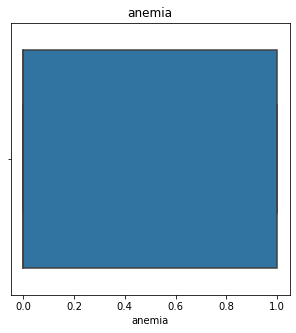

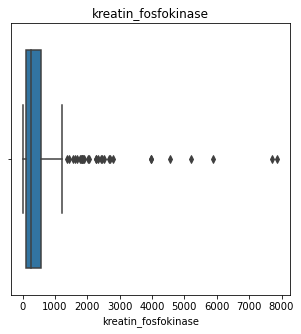

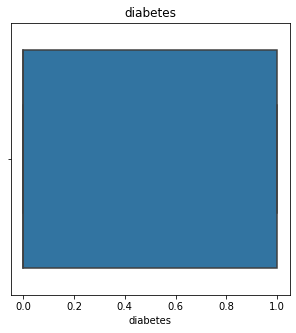

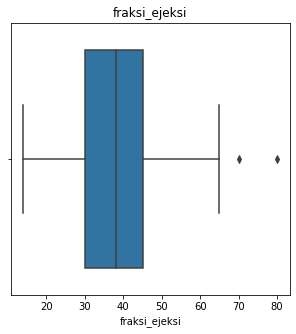

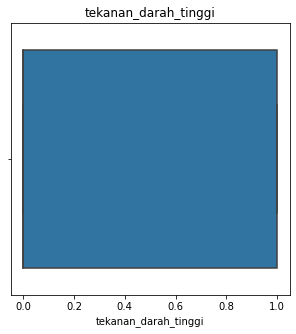

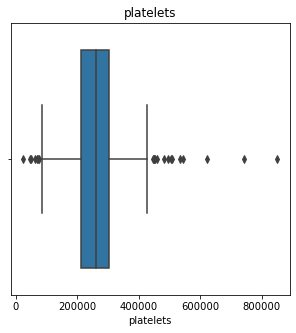

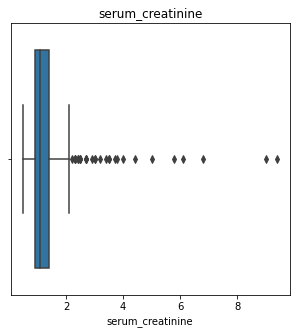

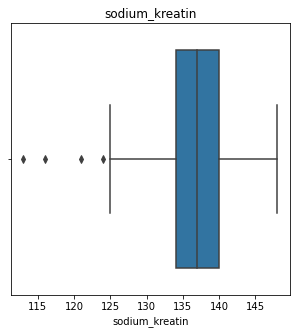

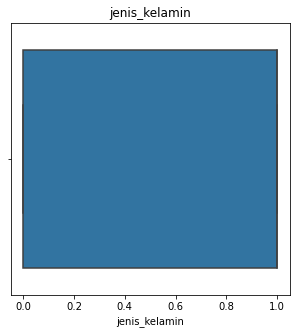

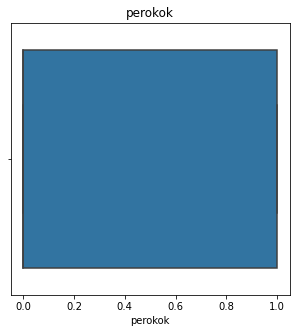

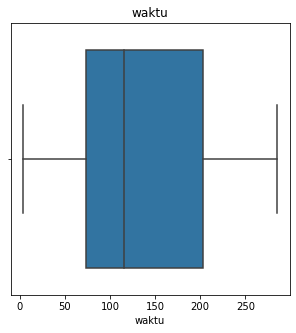

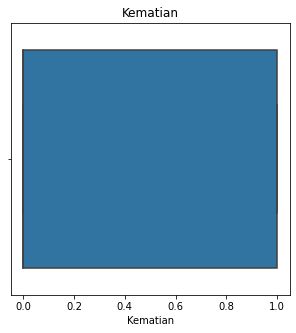

In [28]:
for feature in df:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[feature])
    plt.title(feature)

**KORELASI PEARSON**

Mencoba menggunakan korelasi perason untuk mengukur hubungan linier antara 2 variabel dengan rentang nilai -1 hingga 1 tetapi korelasi Pearson tidak memberikan informasi tentang penyebab dan akibat.

- Jika mendekati 1 maka menunjukkan hubungan linear positif antara 2 variabel
- Jika mendekati -1 maka menunjukkan hubungan linear negatif antara 2 variabel
- Jika mendekati 0 maka tidak ada hubungan

In [29]:
pearson_corr = df.corr(method='pearson')
pearson_corr

,umur,anemia,kreatin_fosfokinase,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,platelets,serum_creatinine,sodium_kreatin,jenis_kelamin,perokok,waktu,Kematian
umur,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
kreatin_fosfokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
fraksi_ejeksi,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
tekanan_darah_tinggi,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
sodium_kreatin,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
jenis_kelamin,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


Dari hasil korelasi pearson di atas, tidak ditemukan hubungan linear baik positif maupun negatif antara variabel lain dengan variabel kematian.

Sehingga akan dicoba metode lain

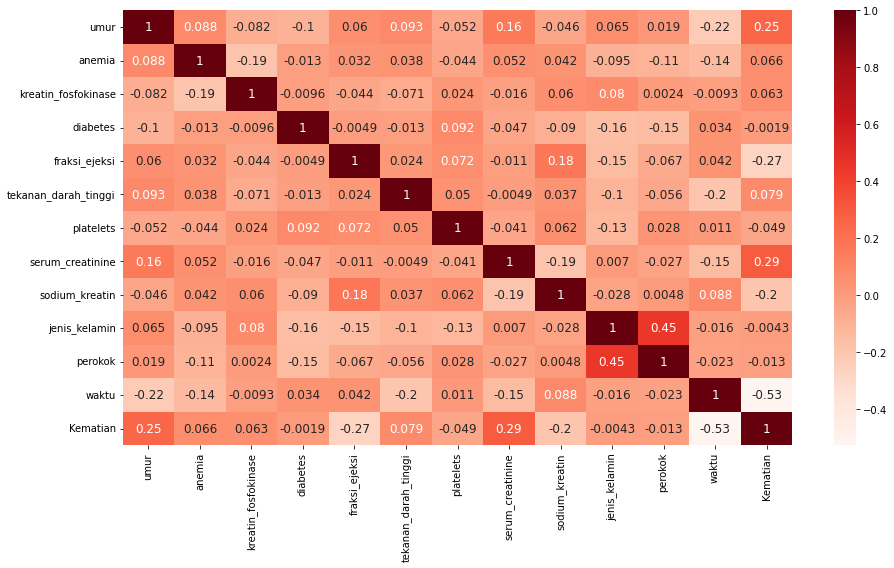

In [30]:
matriksCorr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(matriksCorr, cmap='Reds', annot=True, annot_kws={'fontsize':12})
plt.show()

# Preprocessing Data

In [31]:
df_copy = df.copy()

In [32]:
df_copy.head()

,umur,anemia,kreatin_fosfokinase,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,platelets,serum_creatinine,sodium_kreatin,jenis_kelamin,perokok,waktu,Kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Deteksi dan menangani Outlier

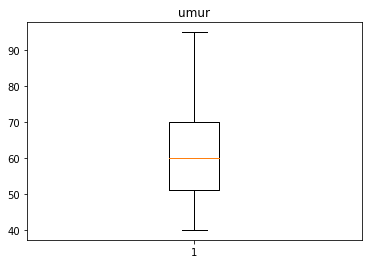

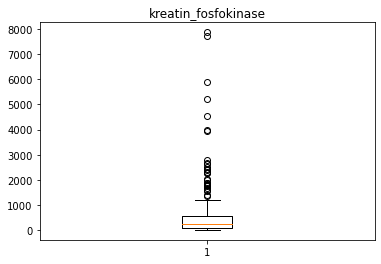

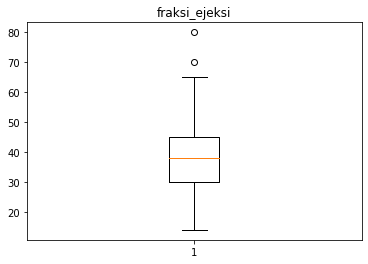

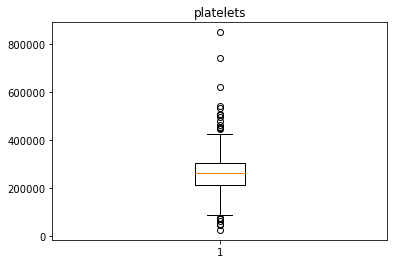

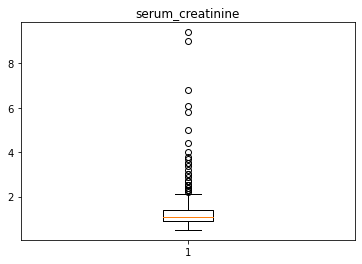

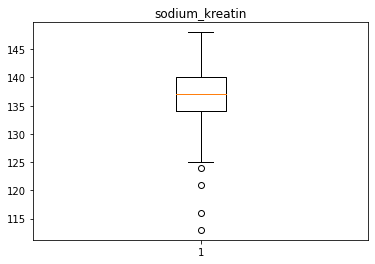

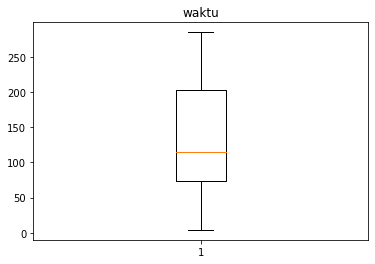

In [33]:
numerical= ['umur', 'kreatin_fosfokinase', 'fraksi_ejeksi', 'platelets', 'serum_creatinine', 'sodium_kreatin', 'waktu'] #numerical_features

#creating boxplot for every numerical feature

for col in df_copy[numerical]:
    plt.boxplot(df_copy[col], vert= True)
    plt.title(col)
    plt.show()

In [34]:
def remove_outlier(df_model):
    Q1 = df_model.quantile(0.25)
    Q3 = df_model.quantile(0.75)
    IQR = Q3 - Q1
    df_model = df_model[~((df_model < (Q1 - 1.5 * IQR)) | (df_model > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_model

In [35]:
def remove_outliers(df_copy):
    for col in df_copy.columns:
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR
        lower_bound = Q1 - 1.5 * IQR
        df_copy = df_copy[(df_copy[col] > lower_bound) & (df_copy[col] < upper_bound)]
    return df_copy

df_copy= remove_outliers(df_copy)

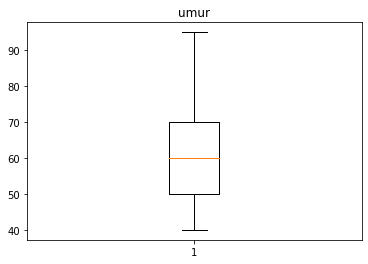

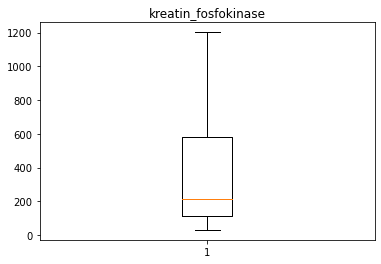

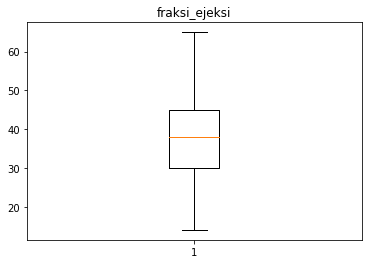

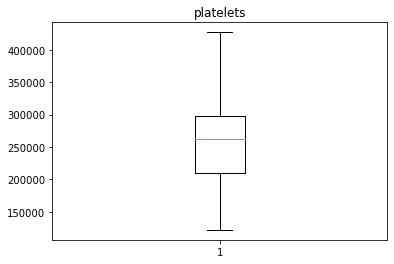

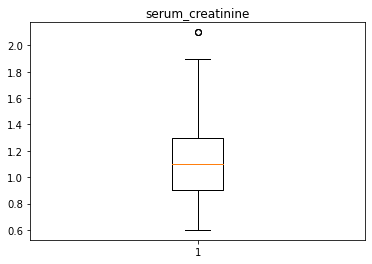

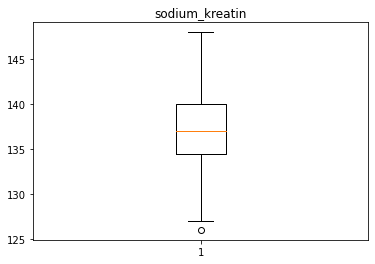

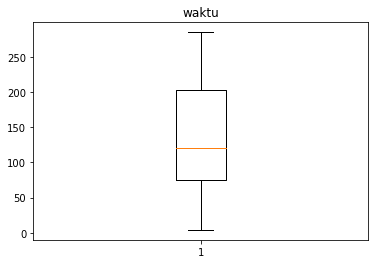

In [36]:
for col in df_copy[numerical]:
    plt.boxplot(df_copy[col], vert= True)
    plt.title(col)
    plt.show()

## Korelasi matrix

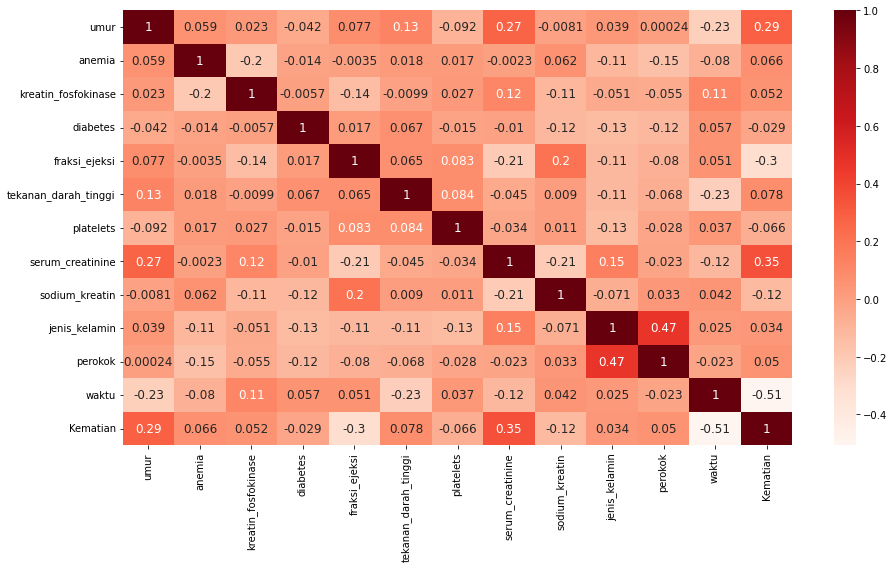

In [37]:
matriksCorr = df_copy.corr()
plt.figure(figsize=(15,8))
sns.heatmap(matriksCorr, cmap='Reds', annot=True, annot_kws={'fontsize':12})
plt.show()

Pada correlation map di atas setelah dilakukan penghapusan outlier, tidak terdapat hasil korelasi yang bagus dan agak bagus.

+ Hasil korelasi yang memiliki korelasi linear positif adalah hubungan antara **jenis kelamin** dengan **perokok** serta hubungan kematian dengan **serum creatinine** dan **umur**

+ Hasil korelasi yang memiliki korelasi linear negatif adalah hubungan antara **waktu** (dihitung dalam hari untuk follow up medical) dengan kematian. Hal ini belum tentu menjadi sebab akibat suatu kematian yang pasti karena diperlukan fitur lainnya.

+ 5 kolom ini tentu akan saling berhubungan sehingga akan diambil sebagai feature dari suatu data yang akan diolah

Fungsi correlation adalah melihat hubungan linier antardua variabel namun korelasi tidak menyiratkan hubungan sebab-akibat dan tidak menggambarkan hubungan nonlinear antara variabel. Sehingga, dapat melakukan pemilihan fitur melalui analisis penyebab kematian akibat *heart_failure*

+ **Anemia** adalah kondisi ketika jumlah sel darah merah rendah sehingga kurang O2, hal ini dapat membuat jantung memompa darah secara berlebihan

+ *Kreatin fosfonikase* berperan dalam pemantauan dan indikator adanya kerusakan/penyakit jantung dan otot. Namun, peningkatan ini tidak secara langsung menyebabkan heart_failure (tidak terlalu dibutuhkan)

+ **diabetes** dapat berkontribusi terhadap perkembangan gagal jantung, hal ini juga dipengaruhi dengan hal lain seperti **tekanan_darah_tinggi**

+ **fraksi_ejeksi** adalah kemampuan pompa jantung yang memiliki hubungan linear negatif dengan kematian. Semakin rendah nilai pompa jantung maka semakin buruk keadaannya, hal ini bisa menjadi salah satu fitur.

+ *platelets* berperan dalam proses pembekuan darah. Sehingga, tidak secara langsung menyebabkan gagal jantung (tidak terlalu dibutuhkan)

+ **sodium_kreatin** jika terlalu rendah maupun terlalu tinggi dapat menjadi gejala penyebab gagal jantung

In [38]:
df2 = df_copy[['umur', 'anemia', 'diabetes', 'fraksi_ejeksi', 'tekanan_darah_tinggi',
                'serum_creatinine', 'sodium_kreatin', 'jenis_kelamin', 'perokok',
                'waktu', 'Kematian']]

df2.head()

,umur,anemia,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,serum_creatinine,sodium_kreatin,jenis_kelamin,perokok,waktu,Kematian
0,75.0,0,0,20,1,1.9,130,1,0,4,1
2,65.0,0,0,20,0,1.3,129,1,1,7,1
3,50.0,1,0,20,0,1.9,137,1,0,7,1
5,90.0,1,0,40,1,2.1,132,1,1,8,1
6,75.0,1,0,15,0,1.2,137,1,0,10,1


# Model inference

In [39]:
# Membuat objek model individu
rf = RandomForestClassifier()
nb = GaussianNB()
et = ExtraTreesClassifier()
gb = GradientBoostingClassifier()

# Pelatihan Model

In [61]:
x = df2.drop("Kematian",axis=1)
y = df2["Kematian"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Membuat model ensemble menggunakan RandomForestClassifier, GaussianNB, ExtraTreesClassifier, dan GradientBoostingClassifier
rf_model = RandomForestClassifier(random_state=42)
nb_model = GaussianNB()
et_model = ExtraTreesClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Melatih model-model individu
rf_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
et_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

# Modeling

In [41]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [62]:

# Membuat ensemble model menggunakan VotingClassifier
estimators = [('rf', rf), ('nb', nb), ('et', et), ('gb', gb)]
ensemble_model_voting = VotingClassifier(estimators=estimators, voting='hard')
ensemble_model_bagging = BaggingClassifier(base_estimator=VotingClassifier(estimators=[('rf', rf), ('nb', nb), ('et', et), ('gb', gb)], voting='hard'), n_estimators=10, random_state=42)
ensemble_model_stacking = StackingClassifier(estimators=estimators, final_estimator=GradientBoostingClassifier(random_state=42))
ensemble_model_bosst = AdaBoostClassifier(base_estimator=gb, n_estimators=10, random_state=42)

# Melatih ensemble model
ensemble_model_voting.fit(X_train, y_train)
ensemble_model_bagging.fit(X_train, y_train)
ensemble_model_stacking.fit(X_train, y_train)
ensemble_model_bosst.fit(X_train, y_train)


# Memprediksi data uji menggunakan ensemble model
ensemble_predictions_voting = ensemble_model_voting.predict(X_test)
ensemble_predictions_bagging = ensemble_model_bagging.predict(X_test)
ensemble_predictions_stacking = ensemble_model_stacking.predict(X_test)
ensemble_predictions_bosst = ensemble_model_bosst.predict(X_test)



# Melatih model-model individu
rf.fit(X_train, y_train)
nb.fit(X_train, y_train)
et.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Melatih model ensemble
ensemble_model.fit(X_train, y_train)

# Memprediksi data uji menggunakan model-model individu
rf_predictions = rf.predict(X_test)
nb_predictions = nb.predict(X_test)
et_predictions = et.predict(X_test)
gb_predictions = gb.predict(X_test)


In [63]:
# Evaluasi performa model-model individu
print("Random Forest Classifier:")
print(classification_report(y_test, rf_predictions))
print("\nGaussian Naive Bayes Classifier:")
print(classification_report(y_test, nb_predictions))
print("\nExtra Trees Classifier:")
print(classification_report(y_test, et_predictions))
print("\nGradient Boosting Classifier:")
print(classification_report(y_test, gb_predictions))


Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        32
           1       0.82      0.85      0.84        33

    accuracy                           0.83        65
   macro avg       0.83      0.83      0.83        65
weighted avg       0.83      0.83      0.83        65


Gaussian Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.67      0.69      0.68        32
           1       0.69      0.67      0.68        33

    accuracy                           0.68        65
   macro avg       0.68      0.68      0.68        65
weighted avg       0.68      0.68      0.68        65


Extra Trees Classifier:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.90      0.82      0.86        33

    accuracy                           0.86        65
   macro avg       0.86      0.86      0.86

In [66]:
# Evaluasi performa ensemble model
print("Ensemble Model(Voting):")
print(classification_report(y_test, ensemble_predictions_voting))
print("===========================================================")
print("Ensemble Model(Bagging):")
print(classification_report(y_test, ensemble_predictions_bagging))
print("===========================================================")
print("Ensemble Model(Stacking):")
print(classification_report(y_test, ensemble_predictions_stacking))
print("===========================================================")
print("Ensemble Model(Bosst):")
print(classification_report(y_test, ensemble_predictions_bosst))

Ensemble Model(Voting):
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        32
           1       0.88      0.85      0.86        33

    accuracy                           0.86        65
   macro avg       0.86      0.86      0.86        65
weighted avg       0.86      0.86      0.86        65

Ensemble Model(Bagging):
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.87      0.82      0.84        33

    accuracy                           0.85        65
   macro avg       0.85      0.85      0.85        65
weighted avg       0.85      0.85      0.85        65

Ensemble Model(Stacking):
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        32
           1       0.88      0.85      0.86        33

    accuracy                           0.86        65
   macro avg       0.86      0.86      0.86        65